<a href="https://colab.research.google.com/github/Aicoaching2025/Financial-Data/blob/main/Financial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Annual Income (k$)  Spending Score (1-100)  Credit Score (300-850)
count          500.000000              500.000000              500.000000
mean            70.171200               50.477392              655.424226
std             19.525103               14.669958               50.512317
min             20.000000                9.546700              505.187231
25%             55.993852               41.070624              619.878519
50%             70.255943               50.427974              655.990292
75%             82.735665               59.768634              687.736918
max            147.054630               89.485731              780.084156


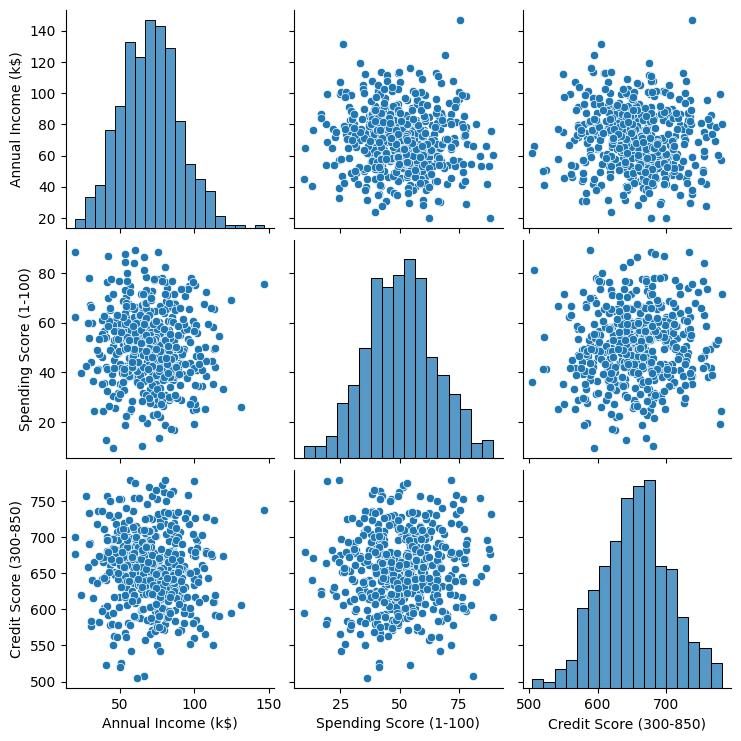

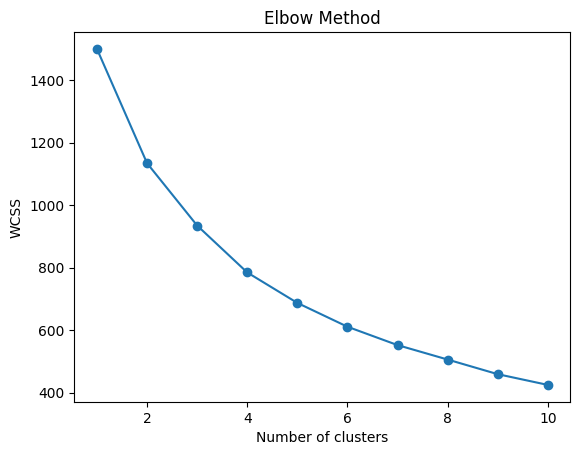

Silhouette Score for k=2: 0.2355
Silhouette Score for k=3: 0.2282
Silhouette Score for k=4: 0.2276
Silhouette Score for k=5: 0.2197
Silhouette Score for k=6: 0.2316


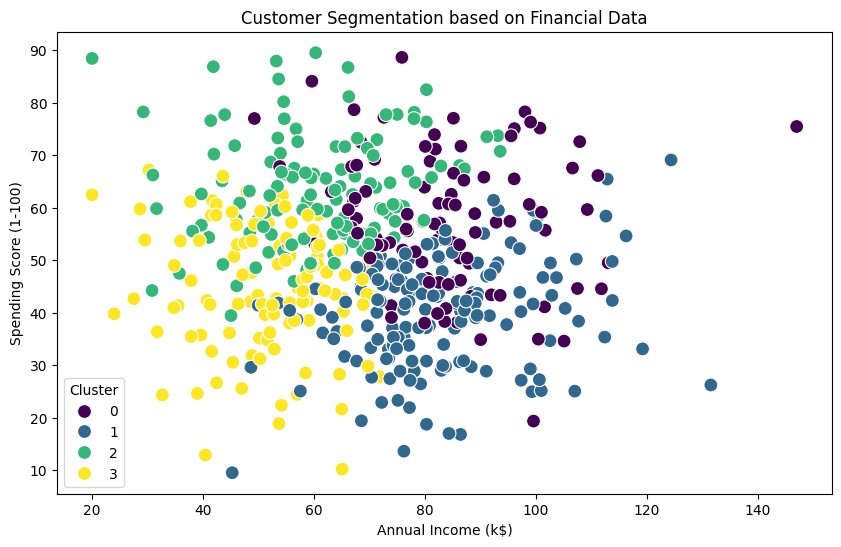


Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)  Credit Score (300-850)
0           84.000010               56.964205              708.285957
1           82.569692               40.203329              622.216113
2           61.030693               63.306843              626.207918
3           51.717242               45.212640              685.258874
Segmented data saved as 'segmented_customers.csv'


In [1]:
# KMeans Clustering Project for Financial Data Segmentation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Data Generation
np.random.seed(42)
n_samples = 500
annual_income = np.clip(np.random.normal(70, 20, n_samples), 20, 150)
spending_score = np.clip(np.random.normal(50, 15, n_samples), 1, 100)
credit_score = np.clip(np.random.normal(650, 50, n_samples), 300, 850)

data = pd.DataFrame({
    'Annual Income (k$)': annual_income,
    'Spending Score (1-100)': spending_score,
    'Credit Score (300-850)': credit_score
})

# Step 2: Data Exploration
print(data.describe())

sns.pairplot(data)
plt.show()

# Step 3: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Choosing Number of Clusters (Elbow Method)
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Silhouette Scores for Clarity
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Step 5: Applying KMeans (Assuming k=4 from elbow method)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=data,
    s=100
)
plt.title('Customer Segmentation based on Financial Data')
plt.show()

# Step 7: Cluster Centers & Interpretation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)', 'Credit Score (300-850)'])
print("\nCluster Centers:")
print(cluster_df)

# Step 8: Save Data & Documentation
data.to_csv('segmented_customers.csv', index=False)
print("Segmented data saved as 'segmented_customers.csv'")
